In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

## Reading and Understanding the data

In [2]:
df1=pd.read_csv("day.csv")

In [3]:
#Check the head of the dataset
df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#checking various aspects of the dataset
df1.shape

(730, 16)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#summary of the numerical columns
df1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Changing the columns 'weekday','season' and 'weathersit' to categorical strings for better model's performance

In [8]:
df1['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
df1['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
df1['weathersit'].replace({1:"Clear_Few Clouds_Partly cloudy",2:'Mist + Cloudy,Broken clouds,Few clouds',3:"Light Snow_Light Rain_Thunderstorm_Scattered clouds_Light Rain Scattered clouds",4:'Heavy Rain,Ice Pallets,Thunderstorm,Mist,Snow,Fog'},inplace=True)
df1['mnth'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace=True)
df1.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Monday,1,"Mist + Cloudy,Broken clouds,Few clouds",14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tuesday,1,"Mist + Cloudy,Broken clouds,Few clouds",14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wednesday,1,Clear_Few Clouds_Partly cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thursday,1,Clear_Few Clouds_Partly cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Friday,1,Clear_Few Clouds_Partly cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,spring,0,Jan,0,Saturday,0,Clear_Few Clouds_Partly cloudy,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,spring,0,Jan,0,Sunday,0,"Mist + Cloudy,Broken clouds,Few clouds",8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,spring,0,Jan,0,Monday,1,"Mist + Cloudy,Broken clouds,Few clouds",6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,spring,0,Jan,0,Tuesday,1,Clear_Few Clouds_Partly cloudy,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,spring,0,Jan,0,Wednesday,1,Clear_Few Clouds_Partly cloudy,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [9]:
# Droping unuseful columns
df1.drop('instant',axis=1,inplace=True)    # its just a record index
df1.drop('casual',axis=1,inplace=True)     # cnt column makes this and registered redundant
df1.drop('registered',axis=1,inplace=True) # cnt column makes this and casual redundant
df1.drop('dteday',axis=1,inplace=True)     # we have month, day ,year in separate columns which makes this redundant

                                                
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,"Mist + Cloudy,Broken clouds,Few clouds",14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,"Mist + Cloudy,Broken clouds,Few clouds",14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear_Few Clouds_Partly cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear_Few Clouds_Partly cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear_Few Clouds_Partly cloudy,9.305237,11.46350,43.6957,12.522300,1600


## Visualising the Data

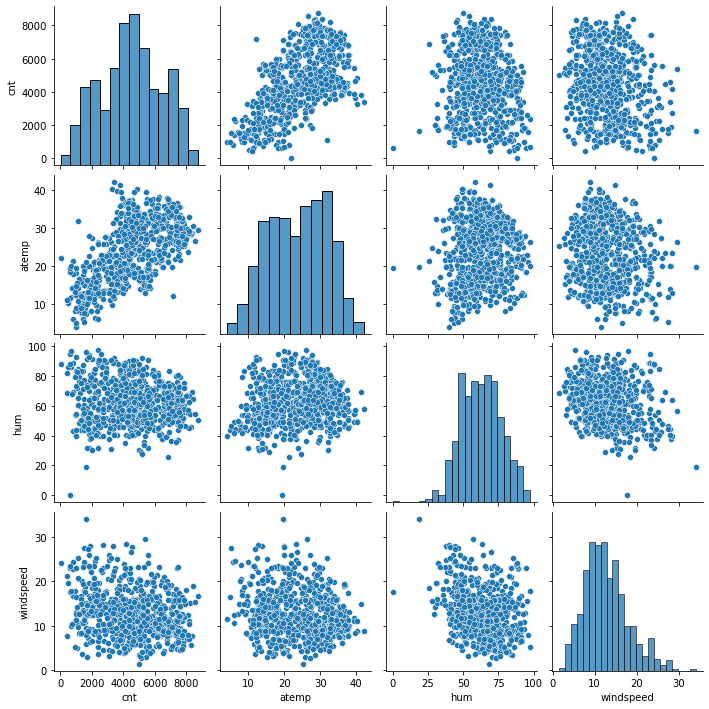

In [10]:
# making pairplot for numerical variables of the dataset
sns.pairplot(df1[['cnt','atemp','hum','windspeed']])
plt.show()

>Insight: cnt and atemp have a linear relationship

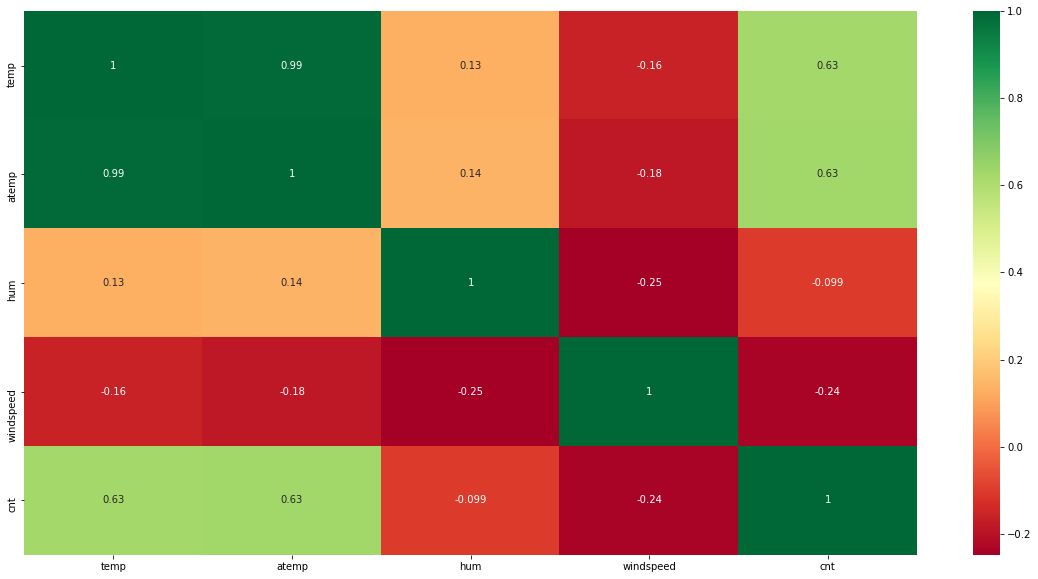

In [11]:
#plotting a heatmap of numerical variables
plt.figure(figsize = (20, 10))
sns.heatmap(df1[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn")
plt.show()

> We see a high correlation between 'temp' and 'atemp' variable

In [12]:
#We see there is a very high correlation between our 2 independent variables 'atemp' and 'temp'
#Dropping temp
df1.drop('temp',axis=1,inplace=True)

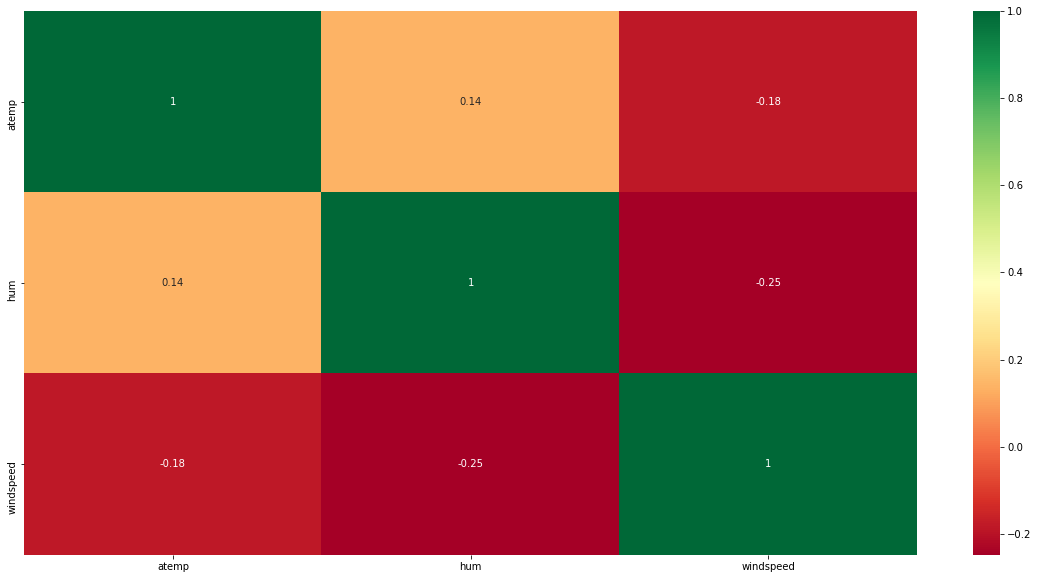

In [13]:
#plotting a heatmap again
plt.figure(figsize = (20, 10))
sns.heatmap(df1[['atemp','hum','windspeed']].corr(), annot = True, cmap="RdYlGn")
plt.show()

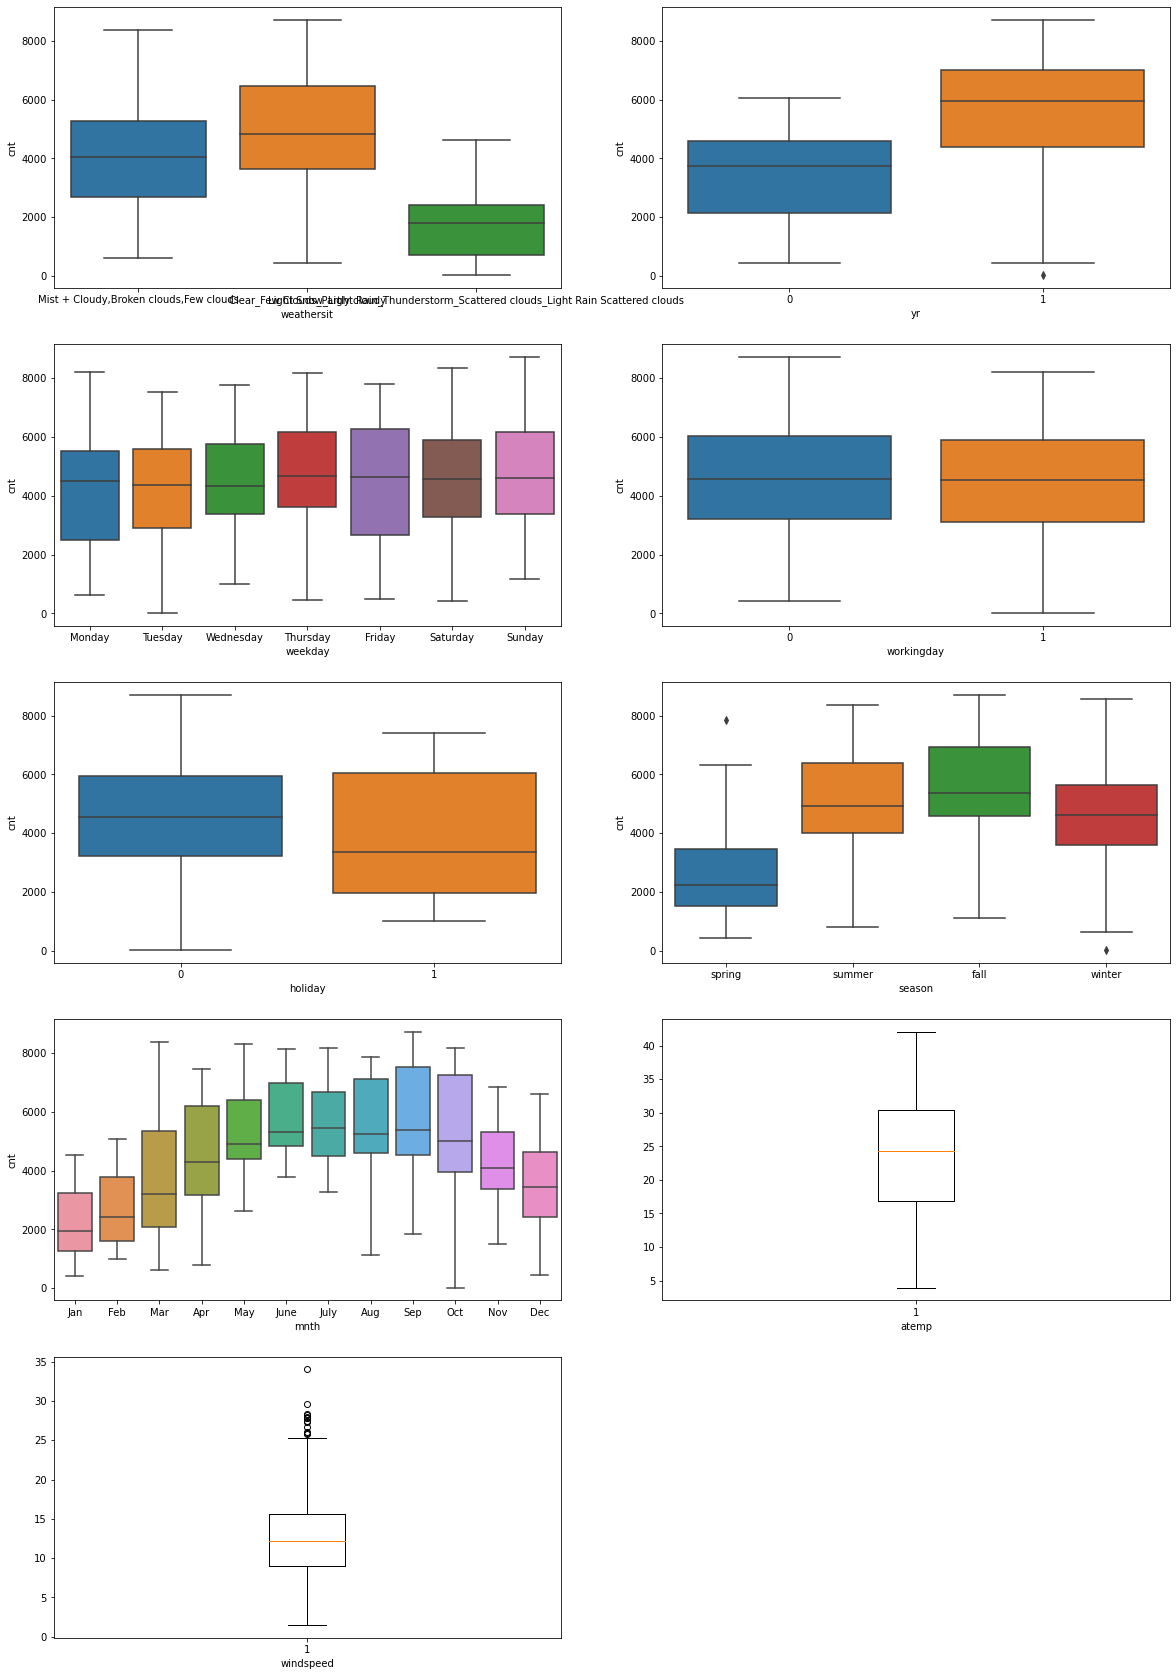

In [14]:
# Plotting boxplots to check outliers in the data

plt.figure(figsize=(20, 30))
plt.subplot(5,2,1)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df1)
plt.subplot(5,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df1)
plt.subplot(5,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df1)
plt.subplot(5,2,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df1)
plt.subplot(5,2,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df1)
plt.subplot(5,2,6)
sns.boxplot(x = 'season', y = 'cnt', data = df1)
plt.subplot(5,2,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = df1)
plt.subplot(5,2,8)
plt.xlabel('atemp')
plt.boxplot(df1.atemp)
plt.subplot(5,2,9)
plt.xlabel('windspeed')
plt.boxplot(df1.windspeed)
plt.show()

We can see our data is well distributed with a visible IQR, and not a lot of outliers.
> We can proceed with our Linear Regression analysis 

## Dummy Variables

In [15]:
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,"Mist + Cloudy,Broken clouds,Few clouds",18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,"Mist + Cloudy,Broken clouds,Few clouds",17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear_Few Clouds_Partly cloudy,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear_Few Clouds_Partly cloudy,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear_Few Clouds_Partly cloudy,11.46350,43.6957,12.522300,1600


In [16]:
Seasons=pd.get_dummies(df1['season'],drop_first=True)
Month=pd.get_dummies(df1['mnth'],drop_first=True)
Day=pd.get_dummies(df1['weekday'],drop_first=True)
Weather=pd.get_dummies(df1['weathersit'],drop_first=True)

In [17]:
#Concatenating the dummy variables to our dataframe
df1=pd.concat([df1,Seasons],axis=1)
df1=pd.concat([df1,Month],axis=1)
df1=pd.concat([df1,Day],axis=1)
df1=pd.concat([df1,Weather],axis=1)

In [18]:
# Dropping redundant columns after dummy creation 
df1.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)

In [19]:
df1.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow_Light Rain_Thunderstorm_Scattered clouds_Light Rain Scattered clouds,"Mist + Cloudy,Broken clouds,Few clouds"
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting the data into training and Testing Sets

In [20]:
from sklearn.model_selection import train_test_split

#We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df1_train,df1_test=train_test_split(df1,train_size=0.7,test_size=0.3,random_state=100)

In [21]:
#Rescaling the feeatures
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [22]:
to_scale=['hum','windspeed','atemp','cnt']
df1_train[to_scale] = scaler.fit_transform(df1_train[to_scale])

In [23]:
#checking the result of scaling
df1_train[['cnt','atemp','hum','windspeed']].describe()

,cnt,atemp,hum,windspeed
count,510.000000,510.000000,510.000000,510.000000
mean,0.513620,0.512989,0.650369,0.320768
std,0.224593,0.212385,0.145882,0.169797
min,0.000000,0.000000,0.000000,0.000000
25%,0.356420,0.332086,0.538643,0.199179
50%,0.518638,0.526811,0.653714,0.296763
75%,0.684710,0.688457,0.754830,0.414447
max,1.000000,1.000000,1.000000,1.000000


In [24]:
#Dividing into X and Y sets for the model building
y_train = df1_train.pop('cnt')
X_train = df1_train

## Using RFE to build a linear model

In [25]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [26]:
# Running RFE with the output number of the variable equal to 10
lm= LinearRegression()
lm.fit(X_train,y_train)
rfe =RFE(lm,10)
rfe =rfe.fit(X_train,y_train)

In [27]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 7),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 10),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', True, 1),
 ('Dec', False, 5),
 ('Feb', False, 4),
 ('Jan', False, 3),
 ('July', False, 15),
 ('June', False, 12),
 ('Mar', False, 19),
 ('May', False, 11),
 ('Nov', False, 6),
 ('Oct', False, 17),
 ('Sep', True, 1),
 ('Monday', False, 14),
 ('Saturday', False, 8),
 ('Sunday', False, 9),
 ('Thursday', False, 18),
 ('Tuesday', False, 13),
 ('Wednesday', False, 16),
 ('Light Snow_Light Rain_Thunderstorm_Scattered clouds_Light Rain Scattered clouds',
  True,
  1),
 ('Mist + Cloudy,Broken clouds,Few clouds', False, 2)]

In [28]:
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'summer', 'winter', 'Aug',
       'Sep',
       'Light Snow_Light Rain_Thunderstorm_Scattered clouds_Light Rain Scattered clouds'],
      dtype='object')

In [29]:
# Creating X_trian dataframe with RFE selected variables
X_train_rfe=X_train[col]

In [30]:
#adding constant because stats model does not include by default
import statsmodels.api as sm
X_train_rfe=sm.add_constant(X_train_rfe)

In [31]:
#Running the model
lm=sm.OLS(y_train,X_train_rfe).fit()

In [32]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.9
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.98e-183
Time:                        18:39:29   Log-Likelihood:                 487.06
No. Observations:                 510   AIC:                            -952.1
Df Residuals:                     499   BIC:                            -905.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================================
                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                               0.2747      0.027     10.328      0.000       0.222       0.327
yr                                                                                  0.2273      0.008     26.942      0.000       0.211       0.244
holiday                                                                            -0.0860      0.027     -3.230      0.001      -0.138      -0.034
atemp                                                                               0.5906      0.023     25.165      0.000       0.544       0.637
hum                                                                                -0.2917      0.032     -9.094      0.000      -0.355      -0.229
windspeed                                                                          -0.1826      0.027     -6.870      0.000      -0.235      -0.130
summer                                                                              0.0976      0.011      8.587      0.000       0.075       0.120
winter                                                                              0.1459      0.011     13.238      0.000       0.124       0.168
Aug                                                                                 0.0640      0.017      3.824      0.000       0.031       0.097
Sep                                                                                 0.1235      0.017      7.343      0.000       0.090       0.157
Light Snow_Light Rain_Thunderstorm_Scattered clouds_Light Rain Scattered clouds    -0.1838      0.026     -7.076      0.000      -0.235      -0.133
==============================================================================
Omnibus:                       52.311   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.004
Skew:                          -0.558   Prob(JB):                     1.44e-26
Kurtosis:                       5.086   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
X_train_rfe=X_train_rfe.drop(['const'],axis=1)

## Looking at VIF values

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X=X_train_rfe
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,hum,10.257190
2,atemp,8.549046
4,windspeed,3.553601
0,yr,2.011221
5,summer,1.820396
6,winter,1.732390
7,Aug,1.537052
8,Sep,1.295333
9,Light Snow_Light Rain_Thunderstorm_Scattered c...,1.090636
1,holiday,1.037116


Dropping 'hum' variable as it is having a very high VIF

In [35]:
# 'hum' variable
X_train_rfe1=X_train_rfe.drop('hum',axis=1)

In [36]:
X_train_rfe1=sm.add_constant(X_train_rfe1)
lm1=sm.OLS(y_train,X_train_rfe1).fit()

In [37]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     221.2
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          4.65e-168
Time:                        18:39:30   Log-Likelihood:                 447.96
No. Observations:                 510   AIC:                            -875.9
Df Residuals:                     500   BIC:                            -833.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================================
                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                               0.0858      0.018      4.788      0.000       0.051       0.121
yr                                                                                  0.2344      0.009     25.868      0.000       0.217       0.252
holiday                                                                            -0.0817      0.029     -2.845      0.005      -0.138      -0.025
atemp                                                                               0.5680      0.025     22.565      0.000       0.519       0.617
windspeed                                                                          -0.1237      0.028     -4.449      0.000      -0.178      -0.069
summer                                                                              0.0870      0.012      7.136      0.000       0.063       0.111
winter                                                                              0.1266      0.012     10.855      0.000       0.104       0.150
Aug                                                                                 0.0535      0.018      2.972      0.003       0.018       0.089
Sep                                                                                 0.1044      0.018      5.799      0.000       0.069       0.140
Light Snow_Light Rain_Thunderstorm_Scattered clouds_Light Rain Scattered clouds    -0.2460      0.027     -9.103      0.000      -0.299      -0.193
==============================================================================
Omnibus:                       57.716   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.117
Skew:                          -0.660   Prob(JB):                     1.66e-25
Kurtosis:                       4.904   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
X_train_rfe1_new=X_train_rfe1.drop(['const'],axis=1)

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X=X_train_rfe1
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,15.883126
3,atemp,1.411233
7,Aug,1.393288
5,summer,1.362040
6,winter,1.258448
8,Sep,1.184478
4,windspeed,1.100077
9,Light Snow_Light Rain_Thunderstorm_Scattered c...,1.031395
1,yr,1.015592
2,holiday,1.013806


> All the VIFs are less than 5

## Residual Analysis

In [40]:
y_train_pred=lm1.predict(X_train_rfe1)

Text(0.5, 0, 'Errors')

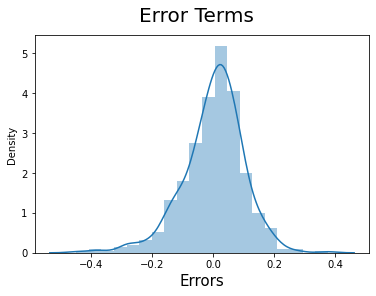

In [51]:
fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=15)

Error Terms are normally distributed centered around 0

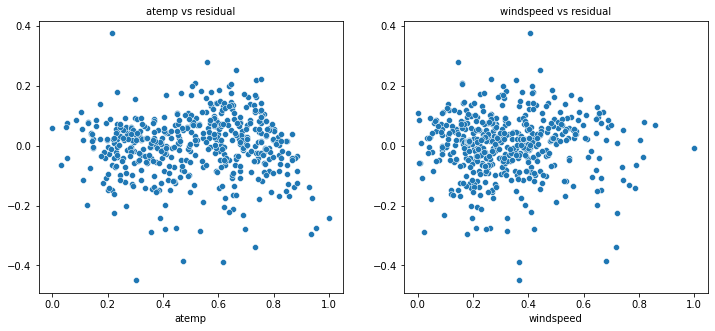

In [42]:
#PLotting the residuals against numerical variables to check for homoscedasticity 
res=y_train-y_train_pred
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('atemp vs residual', fontsize=10)
f1=sns.scatterplot(X_train_rfe1_new.atemp,res)
plt.subplot(1,2,2)
plt.title('windspeed vs residual',fontsize=10)
f2=sns.scatterplot(X_train_rfe1_new.windspeed,res)

No patterns observed

## Testing on Testset

In [43]:
# scaling testset variables
to_scale1=['hum','windspeed','atemp','cnt']
df1_test[to_scale1]=scaler.transform(df1_test[to_scale1])

In [44]:
#checking the transformed scale
df1_test[to_scale1].describe()

,hum,windspeed,atemp,cnt
count,219.000000,219.000000,219.000000,219.000000
mean,0.638508,0.313350,0.532991,0.520592
std,0.148974,0.159947,0.217888,0.218435
min,0.261915,-0.042808,0.025950,0.048205
25%,0.527265,0.198517,0.344751,0.377531
50%,0.627737,0.299459,0.549198,0.524275
75%,0.743928,0.403048,0.714132,0.672745
max,1.002146,0.807474,0.980934,0.963300


In [45]:
#Dividing into X_test and y_test
y_test=df1_test.pop('cnt')
X_test=df1_test

In [46]:
X_test_new=X_test[X_train_rfe1_new.columns]
X_test_new=sm.add_constant(X_test_new)

In [47]:
#Predicting using our model
y_test_pred=lm1.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'Predictions')

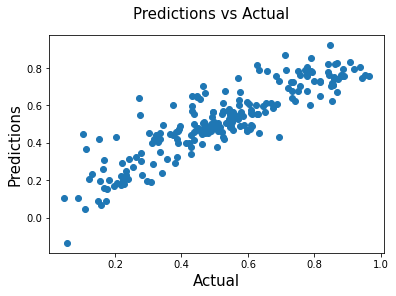

In [48]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Predictions vs Actual', fontsize=15)         # Plot heading 
plt.xlabel('Actual', fontsize=15)                          # X-label
plt.ylabel('Predictions', fontsize=15)

In [49]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7748525737132625

> We have a rscore of 0.77

## Final Results
#### The variables that are significant in predicting the demand of shared bikes

## Variables that are positively affecting the bikes demand
> 1. atemp : 0.5680(coeficient)<br>
2.yr : 0.2344(coeficient)<br>
3.winter : 0.1266(coeficient)<br>
4.Sep : 0.1044(coeficient)<br>
5.summer:0.0870(coeficient)

## Variables that are negatively affecting the bikes demand
>1.Light Snow_Light Rain_Thunderstorm_Scattered clouds_Light Rain Scattered clouds:  -0.2460(coeficient)<br>
2.windspeed : -0.1237(coeficient)<br>
3.holiday : -0.0817(coeficient)

### The equation of our line is

$ cnt=0.5680 \times atemp + 0.2344 \times yr + 0.1266 \times winter + 0.1044 \times Sep + 0.0870 \times Summer - 0.2460 \times  Light Snow_Light Rain_Thunderstorm_Scattered clouds_Light Rain Scattered clouds - 0.1237 \times windspeed - 0.0817 \times holiday $